# Features selection for the 24 months prediction

## Libraries

In [56]:
## for data
import pandas as pd
import numpy as np # Used to do data processing

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy.stats as stats
import statsmodels.formula.api as smf
# import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Used to check stationarity 

## for machine learning
import sklearn
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## for cleaning data
from DreamLib.processing_datas import *

In [57]:
sns.set(rc={"figure.figsize":(18, 6)})

color: https://matplotlib.org/stable/gallery/color/named_colors.html

# Data importation and formating

In [58]:
# Same link for everyone:
data = pd.read_sas("datas/total_red.sas7bdat")

In [84]:
dft,Yt = clean_data(data,start=1,period=24,chronique=b'Totale',col_used=None,split=0,norm="Not")

In [85]:
df2,Y2 = clean_data(data,start=1,period=24,chronique=b'CHR2',col_used=None,split=0,norm="Not")

In [86]:
df8,Y8 = clean_data(data,start=1,period=24,chronique=b'CHR8',col_used=None,split=0,norm="Not")

# Split Data set

On sépare les catégories de données

In [87]:
col_portefeuille = ['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8']
       
col_clients = ['CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1','CD_PROF_2', 'CD_QUAL_VEH_1']

col_macro = ['PIB','Inflation', 'Tx_cho']

Definition des 3 datasets des 3 chroniques

In [88]:
Xt = dft[[*col_portefeuille,*col_clients,*col_macro]]
col_portefeuille.append("median_5")
X2 = df2[[*col_portefeuille,*col_clients,*col_macro]]
X8 = df8[[*col_portefeuille,*col_clients,*col_macro]]

# Feature selection explication methodes

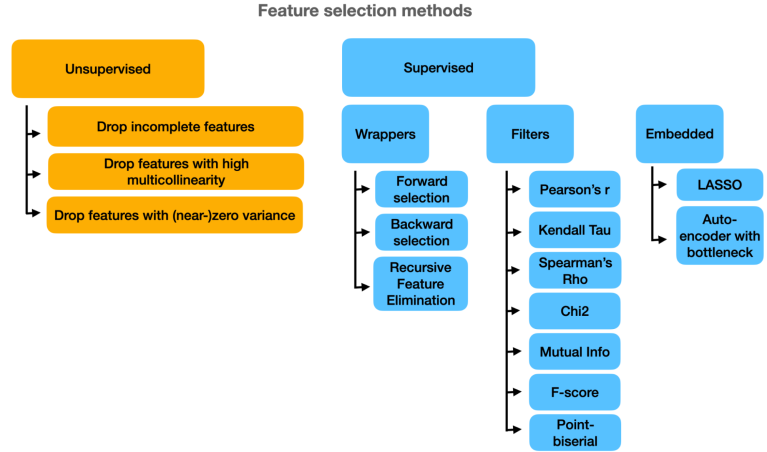




*   https://neptune.ai/blog/feature-selection-methods
*   https://en.wikipedia.org/wiki/Feature_selection#Main_principles
* https://scikit-learn.org/stable/modules/feature_selection.html



* **Approche graphique**: approche naive

*   **Unsupervised methods**: Low variance
*   **Wrapper methods**:
  * **Backward selection**: SequentialFeatureSelector Backward
  * **Forward selection**: SequentialFeatureSelector Forward
  * **Recursive Feature Elimination**: Recursive Feature Elimination,Tree-based feature selection, SelectFromModel
* **Filter method**: correlation analysis, Kbest



# Feature selection de chronique totale

In [89]:
col_portefeuille.remove("median_5")

## Approche naive par analyse des graphiques

In [10]:
col_totale_naive = ['mean_3', 'PIB', 'p95_3', 'mean_5', 'p95_5', 'mean_6', 'p95_6', 'CD_ETA_CIV_1', 'p95_1', 'p95_8', 'mean_1', 'p95_7',
                    'mean_4', 'mean_8', 'mean_7', 'Tx_cho', 'mean_2', 'CD_MOD_HABI_1', 'p95_4', 'p95_2']

On supprime la première ligne car elle peut biaiser le modèle, valeur de DR=0.024

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9137.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    4.44e-10
Time:                        23:25:58   Log-Likelihood:                          197.74
No. Observations:                  25   AIC:                                     -355.5
Df Residuals:                       5   BIC:                                     -331.1
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =7.892663237699127e-09')

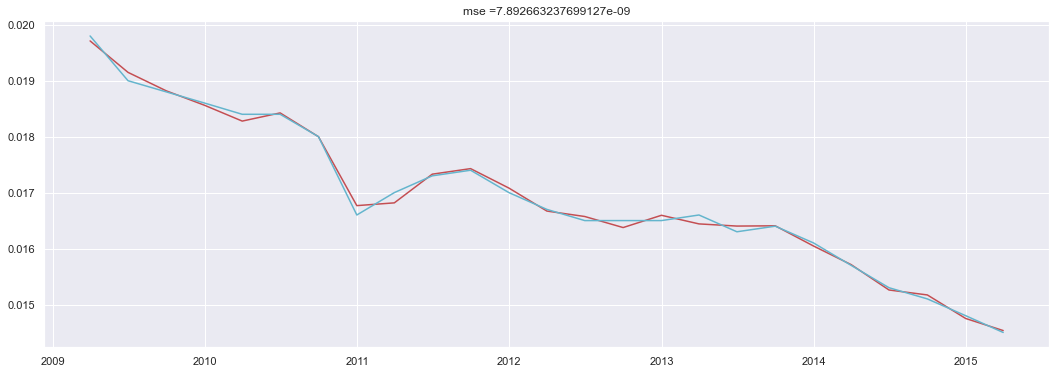

In [11]:
Xnaif = dft[col_totale_naive].iloc[1:,]
Ynaif = Yt[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

En splitant les données en train et test

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     16.79
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.190
Time:                        23:25:58   Log-Likelihood:                 173.90
No. Observations:                  21   AIC:                            -307.8
Df Residuals:                       1   BIC:                            -286.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
mean_3        -2.291e-05      0.000     -0.170

Text(0.5, 1.0, 'mse =5.102503057446688e-07')

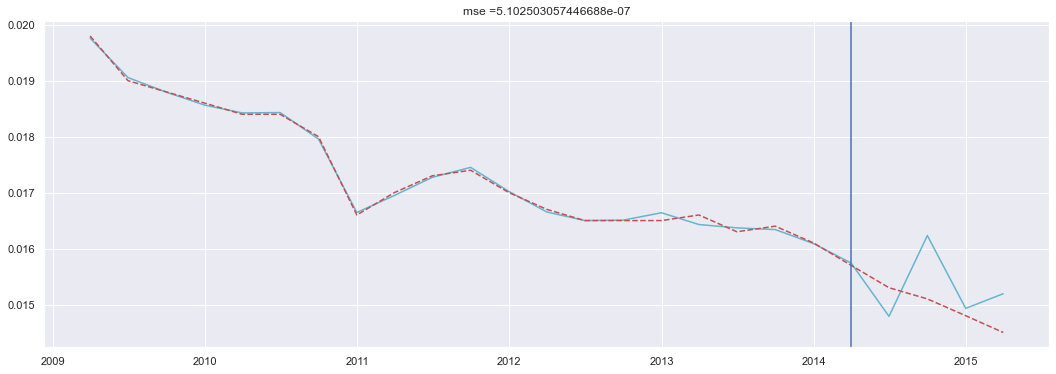

In [12]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(Xnaif,Ynaif,0.15)

model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

On enlève les variables avec une p-value très élévé (signigiant que l'hypothèse qu'il soit nul est acceptée)

In [13]:
new_col_totale_naive = col_totale_naive.copy()
new_col_totale_naive.remove('CD_ETA_CIV_1')
new_col_totale_naive.remove('p95_3')
new_col_totale_naive.remove('mean_1')
new_col_totale_naive.remove('p95_4')
n_Xnaif = Xnaif[new_col_totale_naive]

In [14]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(n_Xnaif,Ynaif,0.15)

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9098.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    4.68e-10
Time:                        23:25:58   Log-Likelihood:                          163.27
No. Observations:                  21   AIC:                                     -294.5
Df Residuals:                       5   BIC:                                     -277.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.6372249642152667e-07')

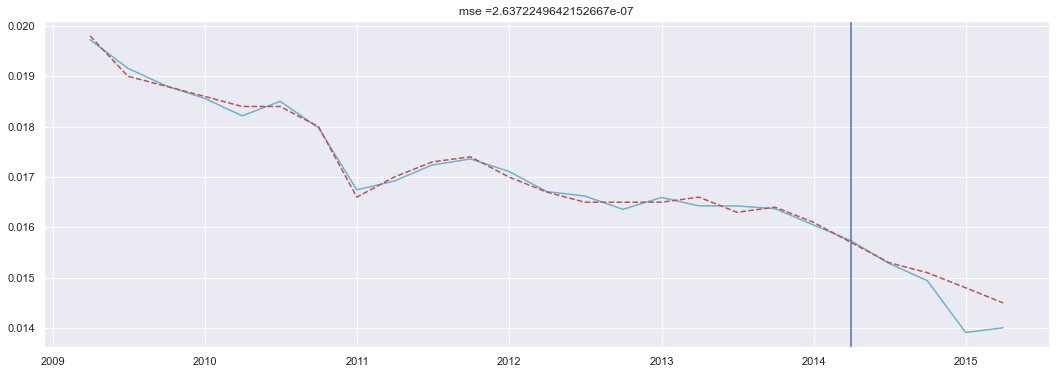

In [15]:
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(n_Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

## Analyse des correlations

In [90]:
def corre(X,Y):
  X.insert(0, 'DR', Y)
  cor = X.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()

In [91]:
print(col_portefeuille)
       
print(col_clients)

print(col_macro) 

['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1', 'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7', 'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8', 'p95_8']
['CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1']
['PIB', 'Inflation', 'Tx_cho']


### Analyse des variables caractéristiques du portfeuille

In [92]:
col_totale_corr = []

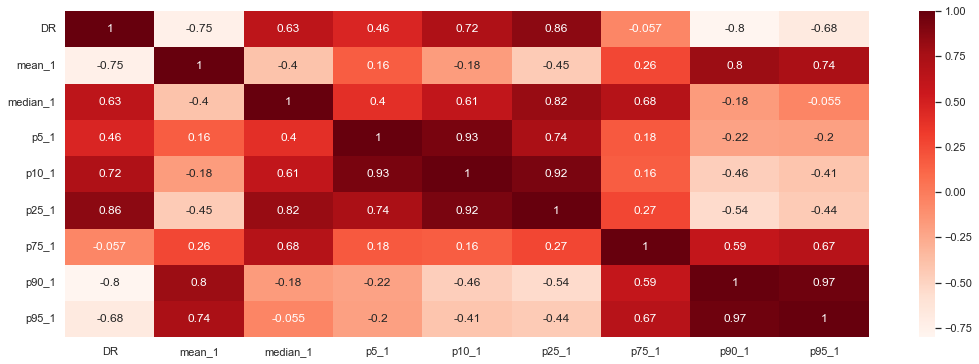

In [93]:
# Note d'octroi recalulée
corre(Xt[col_portefeuille[0:8]],Yt)

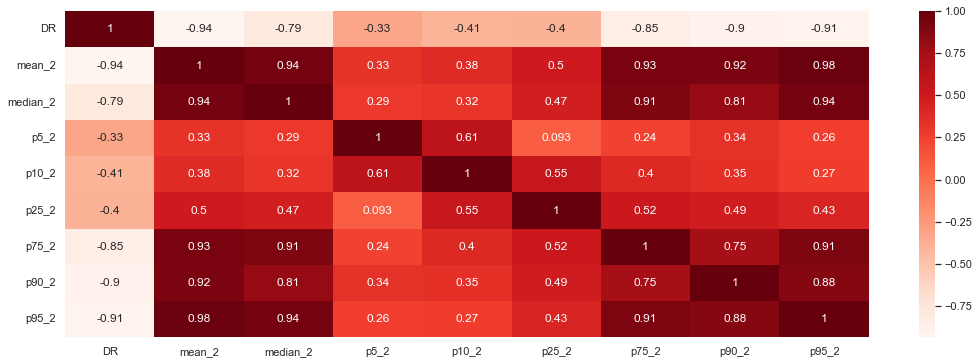

In [94]:
#Durée écoulée depuis le dernier impayé
corre(Xt[col_portefeuille[8:16]],Yt)

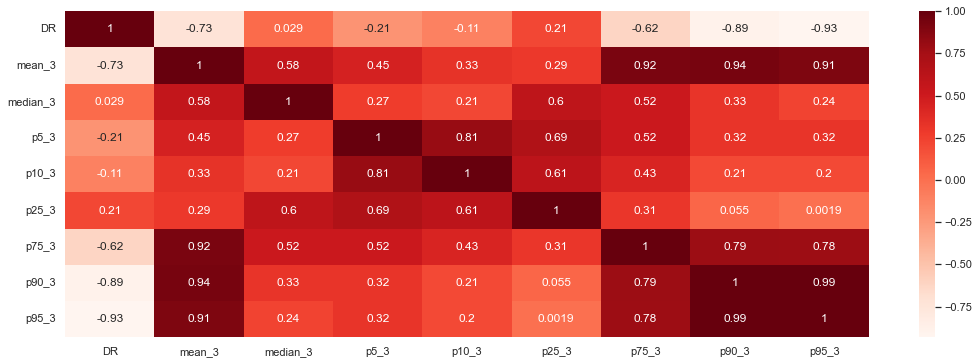

In [95]:
# Durée de l'impayé encours
corre(Xt[col_portefeuille[16:24]],Yt)

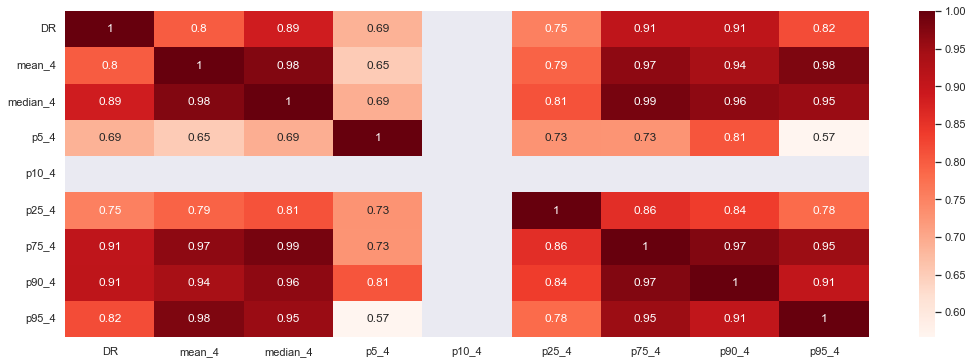

In [96]:
# Durée maximale de l'impayé
corre(Xt[col_portefeuille[24:32]],Yt)

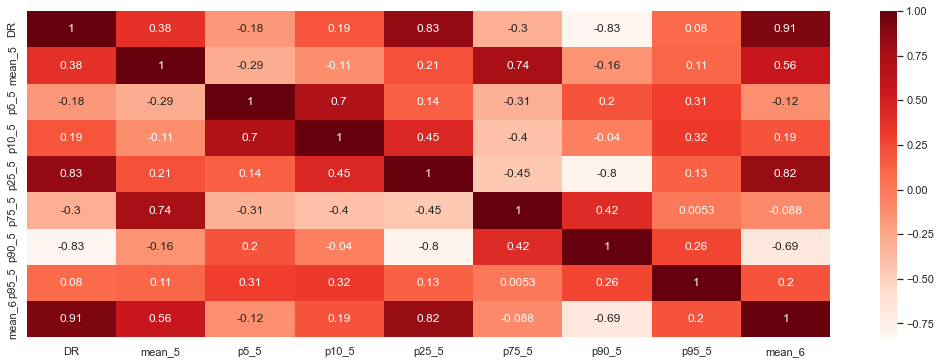

In [97]:
# Créance après répartition solde créditeurs
corre(Xt[col_portefeuille[32:40]],Yt)

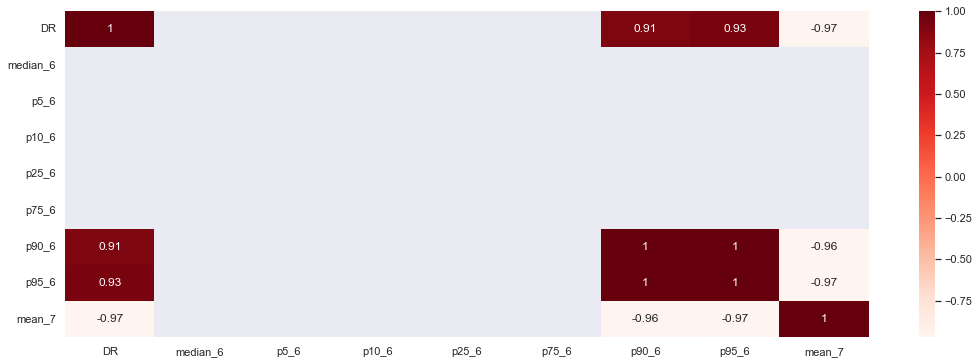

In [98]:
# Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion
corre(Xt[col_portefeuille[40:48]],Yt)

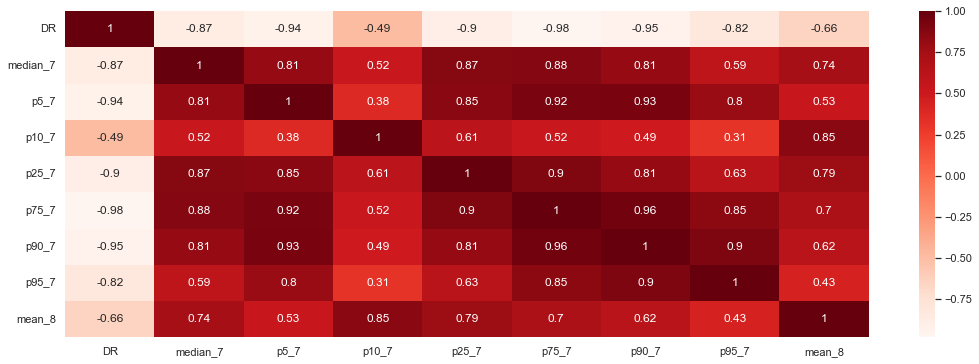

In [99]:
# Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat
corre(Xt[col_portefeuille[48:56]],Yt)

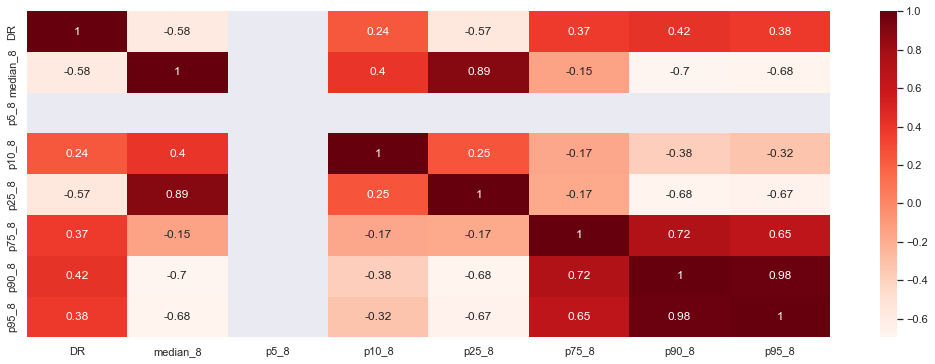

In [100]:
# Pourcentage apport
corre(Xt[col_portefeuille[56:64]],Yt)

### Analyse des variables caractéristiques des clients

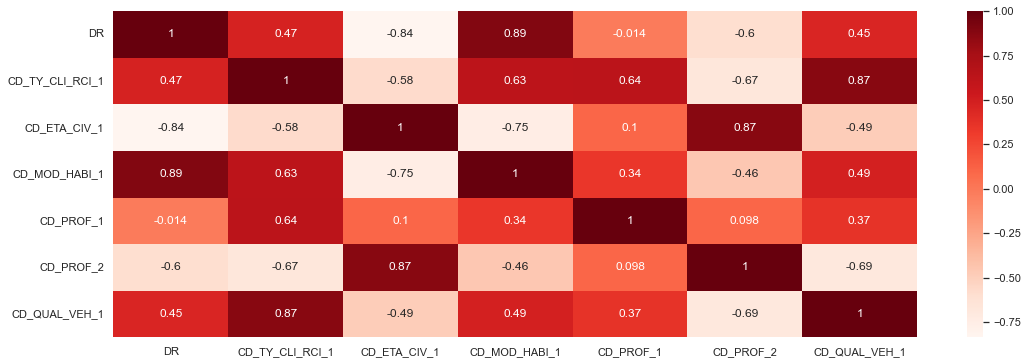

In [101]:
corre(Xt[col_clients],Yt)

### Analyse des variables macro

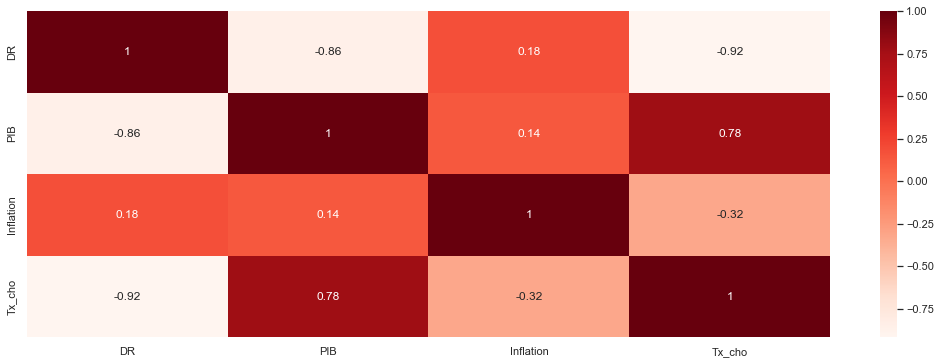

In [102]:
corre(Xt[col_macro],Yt)

### Multicollinéarité test
On va analyser les différentes colonnes obtenues et enlever les variables qui sont trop colinéaires entre elles

In [157]:
def keep_col(df,Y,tresholdDR,interTreshold):
  df_temp = df.copy()
  df_temp.insert(loc=0, column='DR', value=Y.values)
  corr_matrix = df_temp.corr()
  *index, = map(lambda x: abs(x)>tresholdDR,corr_matrix.loc['DR'])
  print('Columns with corr with DR >' +str(tresholdDR)+':',df_temp.columns[index].values[1:],str(index.count(True)-1)+' variables',sep='\n')
  
  print('\n','After studying inter correlation')
  keep_col = set()
  cols = df_temp.columns[index].values[1:]
  for col1 in cols:
    for col2 in cols:
      if col1 != col2 and abs(corr_matrix.loc[col1,col2])>interTreshold:
        col_to_keep =corr_matrix.loc['DR',[col1,col2]].idxmax()
        keep_col.add(col_to_keep)
  print('Columns with inter corr<' +str(interTreshold)+':',keep_col,str(len(keep_col))+' variables',sep='\n')
  return list(keep_col)

In [107]:
col_totale_corr = keep_col(Xt,Yt,0.90,0.90)

Columns with corr with DR >0.9:
['mean_2' 'p90_2' 'p95_2' 'p95_3' 'p75_4' 'p90_4' 'mean_6' 'p90_6' 'p95_6'
 'mean_7' 'p5_7' 'p75_7' 'p90_7' 'Tx_cho']
14 variables

 After studying inter correlation
Columns with inter corr<0.9:
{'p90_7', 'p95_2', 'p5_7', 'p90_6', 'p95_6', 'p90_2', 'mean_6', 'mean_2', 'mean_7', 'p75_4', 'p90_4', 'p95_3', 'Tx_cho'}
13 variables


### Conclusion

In [108]:
print(f'Il y a {len(col_totale_corr)} variables:', col_totale_corr,sep='\n')

Il y a 13 variables:
['p90_7', 'p95_2', 'p5_7', 'p90_6', 'p95_6', 'p90_2', 'mean_6', 'mean_2', 'mean_7', 'p75_4', 'p90_4', 'p95_3', 'Tx_cho']


On garde cette sélection de variables que l'on va ajouter dans notre fichier columns.py

## Low variance method

In [113]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =0.25).fit(Xt)
col_totale_vt = Xt.loc[:,vt.get_support()].columns
print(f'Il y a {len(col_totale_vt)} variables:', col_totale_vt,sep='\n')

Il y a 32 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5',
       'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Kbest method

In [114]:
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(f_regression, k=20).fit(Xt, Yt)
col_totale_kb = Xt.loc[:,kb.get_support()].columns
print(f'Il y a {len(col_totale_kb)} variables:', col_totale_kb,sep='\n')

Il y a 20 variables:
Index(['p25_1', 'mean_2', 'p90_2', 'p95_2', 'p90_3', 'p95_3', 'median_4',
       'p75_4', 'p90_4', 'mean_6', 'p90_6', 'p95_6', 'mean_7', 'median_7',
       'p5_7', 'p25_7', 'p75_7', 'p90_7', 'CD_MOD_HABI_1', 'Tx_cho'],
      dtype='object')


/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in divide
  corr /= X_norms
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


## Recursive feature elimination with cross-validation to select features.



In [115]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
rfecv = RFECV(linreg, step=1, min_features_to_select=15, cv=8).fit(Xt, Yt)
col_totale_rfecv = Xt.loc[:,rfecv.get_support()].columns
print(f'Il y a {len(col_totale_rfecv)} variables:', col_totale_rfecv,sep='\n')

Il y a 61 variables:
Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p75_1', 'p90_1', 'p95_1',
       'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4',
       'p75_4', 'p90_4', 'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5',
       'p90_5', 'p95_5', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7',
       'p75_7', 'p90_7', 'p95_7', 'mean_8', 'median_8', 'p10_8', 'p25_8',
       'p75_8', 'p90_8', 'p95_8', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1',
       'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Feature selection using SelectFromModel

In [116]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
sfm = SelectFromModel(linreg).fit(Xt, Yt)
col_totale_sfm  = Xt.loc[:,sfm .get_support()].columns
print(f'Il y a {len(col_totale_sfm )} variables:', col_totale_sfm ,sep='\n')

Il y a 17 variables:
Index(['mean_2', 'median_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2',
       'mean_3', 'median_3', 'p10_3', 'p75_3', 'p90_3', 'mean_4', 'median_4',
       'p25_4', 'p90_4', 'Inflation'],
      dtype='object')


## Tree-based feature selection

In [117]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
etc = ExtraTreesRegressor(n_estimators=50).fit(Xt, Yt)
sfm2 = SelectFromModel(etc, prefit=True)
col_totale_sfm2  = Xt.loc[:,sfm2 .get_support()].columns
print(f'Il y a {len(col_totale_sfm2 )} variables:', col_totale_sfm2 ,sep='\n')

Il y a 10 variables:
Index(['p25_1', 'p90_1', 'p75_2', 'p90_2', 'p95_2', 'p90_3', 'p90_4', 'p5_7',
       'p90_7', 'Tx_cho'],
      dtype='object')


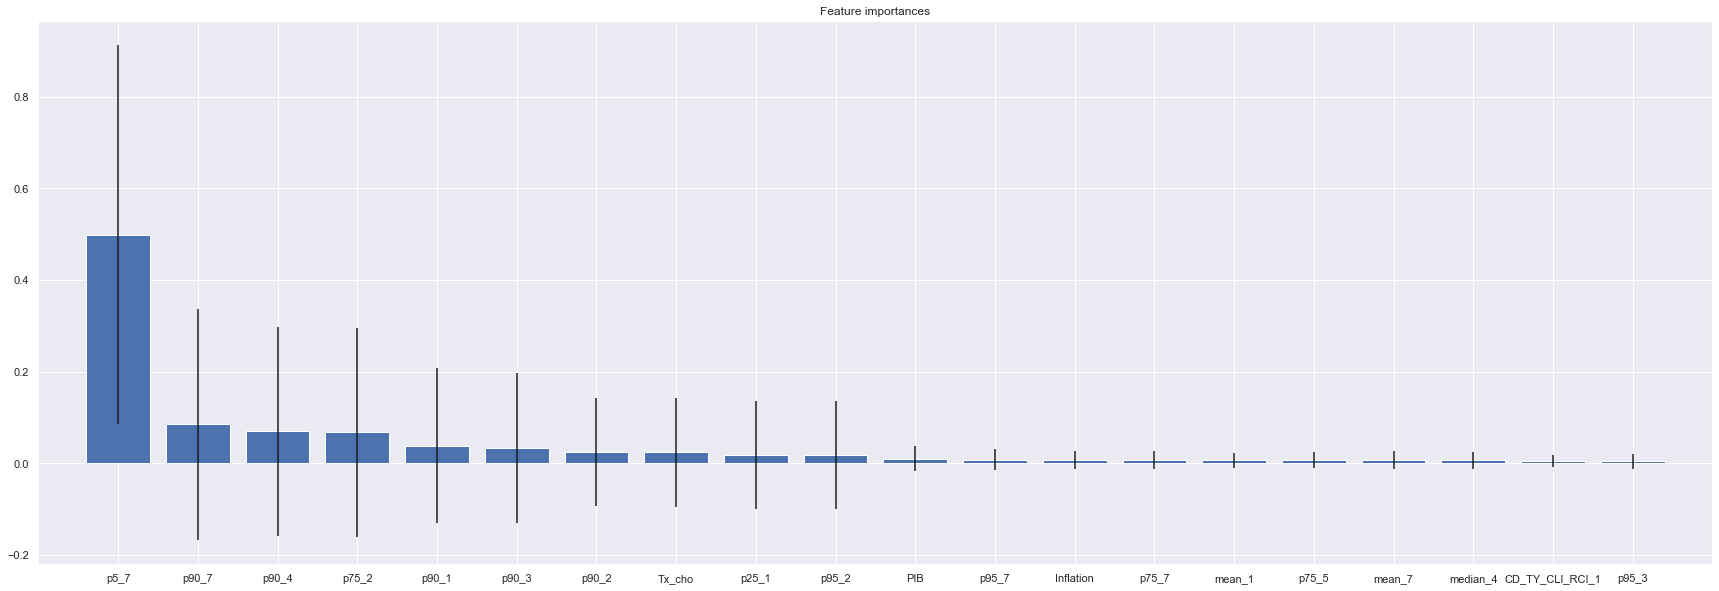

In [118]:
#plot the importances #
importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
indices_names = list(map(lambda x : Xt.columns[x],indices))
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices_names)
plt.xlim([-1, len(indices)])
plt.show()

## Sequential Feature Selection 

In [119]:
# forward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_forward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='forward').fit(Xt, Yt)
col_totale_sfs_forward  = Xt.loc[:,sfs_forward .get_support()].columns
print(f'Il y a {len(col_totale_sfs_forward )} variables:', col_totale_sfs_forward ,sep='\n')

Il y a 20 variables:
Index(['p25_2', 'p75_2', 'p5_3', 'p5_5', 'p25_5', 'median_6', 'p5_6', 'p10_6',
       'p25_6', 'p75_6', 'p90_6', 'p95_6', 'median_7', 'p5_7', 'p25_7',
       'p75_7', 'p5_8', 'p95_8', 'CD_PROF_1', 'CD_PROF_2'],
      dtype='object')


In [120]:
# backward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_backward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='backward').fit(Xt, Yt)
col_totale_sfs_backward  = Xt.loc[:,sfs_backward .get_support()].columns
print(f'Il y a {len(col_totale_sfs_backward )} variables:', col_totale_sfs_backward ,sep='\n')

Il y a 20 variables:
Index(['mean_2', 'p5_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'p5_3', 'p75_3',
       'p95_3', 'mean_4', 'median_4', 'p90_4', 'mean_5', 'p5_5', 'p10_5',
       'p25_5', 'p75_5', 'p90_5', 'p95_5', 'PIB'],
      dtype='object')


## Show what feature was selected

In [127]:
cols_feature_selection = [col_totale_corr,col_totale_vt,col_totale_kb,col_totale_rfecv,col_totale_sfm,col_totale_sfm2,col_totale_sfs_forward,col_totale_sfs_backward]
method = ['Methode correlation','Low variance methode','Methode Kbest','Methode RFECV','Methode SelectFromModel','Method Tree','Methode sequential forward','Methode sequential backward']

In [128]:
for cols, met in zip(cols_feature_selection,method):
  print('-'*40)
  print(f'{met}: {len(cols)} variables')
  print(cols)
print('-'*40,end='\n')

----------------------------------------
Methode correlation: 13 variables
['p90_7', 'p95_2', 'p5_7', 'p90_6', 'p95_6', 'p90_2', 'mean_6', 'mean_2', 'mean_7', 'p75_4', 'p90_4', 'p95_3', 'Tx_cho']
----------------------------------------
Low variance methode: 32 variables
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5',
       'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')
----------------------------------------
Methode Kbest: 20 variables
Index(['p25_1', 'mean_2', 'p90_2', 'p95_2', 'p90_3', 'p95_3', 'median_4',
       'p75_4', 'p90_4', 'mean_6', 'p90_6', 'p95_6', 'mean_7', 'median_7',
       'p5_7', 'p25_7', 'p75_7', 'p90_7', 'CD_MOD_HABI_1', 'Tx_cho'],
      dtype='object')
----------------------------------------
Methode RFECV: 61 

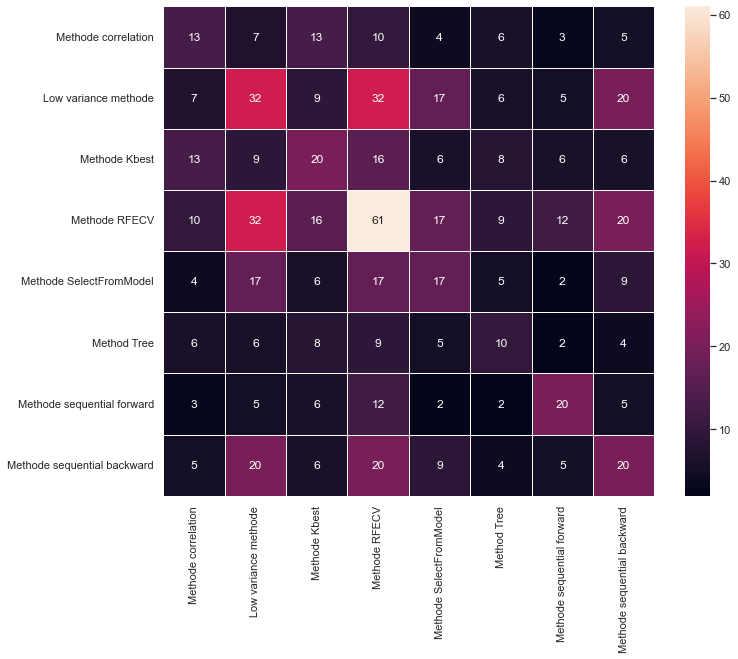

In [129]:
import itertools
df_common = pd.DataFrame(columns=method, index=method)
for i, j in itertools.product(range(len(method)),range(len(method))):
  col1, col2 = cols_feature_selection[i], cols_feature_selection[j]
  method1, method2 = method[i], method[j]
  n_common = len(set(col1).intersection(col2))
  df_common.loc[method1,method2] = n_common

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_common.astype('float64'), annot=True,linewidth=.5,ax=ax)
plt.show()

In [144]:
col_portefeuille.append("median_5")

# Feature selection de chronique 2

## Approche naive par analyse des graphiques 

In [53]:
X2.columns

Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1',
       'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 'Inflation',
       'Tx_cho'],
      dtype='object')

In [54]:
col_2_naive = [ 'median_1', 'p25_1', 'median_2', 'mean_4', 'mean_5', 'median_5','p90_5', 'p95_5', 
             
       'mean_8', 'median_8','p10_8', 'p25_8',  'CD_MOD_HABI_1',
       'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 
       'Tx_cho']

On supprime la première ligne car elle peut biaiser le modèle, valeur de DR=0.024

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              820.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    6.74e-10
Time:                        23:26:38   Log-Likelihood:                          213.87
No. Observations:                  25   AIC:                                     -391.7
Df Residuals:                       7   BIC:                                     -369.8
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.172142471296547e-09')

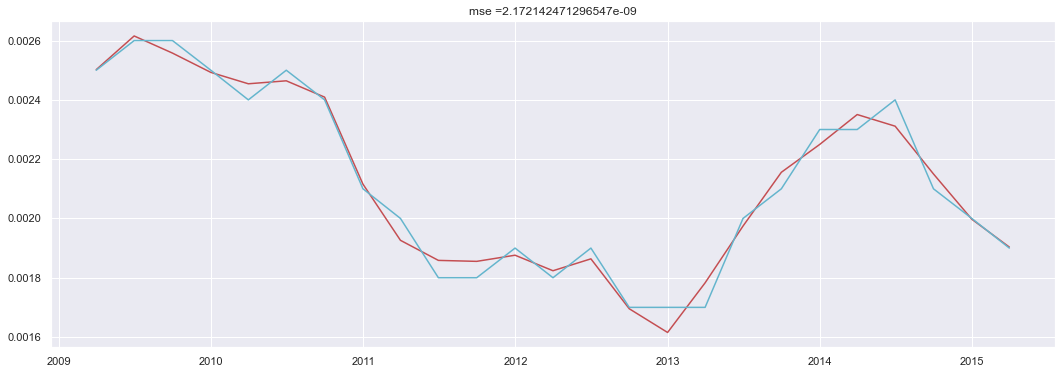

In [55]:
Xnaif = df2[col_2_naive].iloc[1:,]
Ynaif = Y2[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

En splitant les données en train et test

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              435.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    0.000158
Time:                        23:26:38   Log-Likelihood:                          181.85
No. Observations:                  21   AIC:                                     -327.7
Df Residuals:                       3   BIC:                                     -308.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =1.8377744674853945e-08')

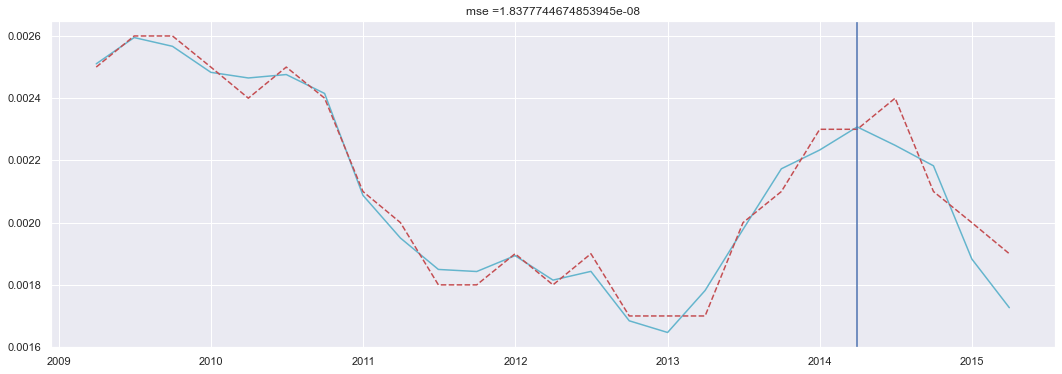

In [56]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(Xnaif,Ynaif,0.15)

model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

On enlève les variables avec une pvalue très élévé (signigiant que l'hypothèse qu'il soit nul est validé)

In [57]:
new_col_2_naive = col_2_naive.copy()
new_col_2_naive.remove('CD_PROF_2')
new_col_2_naive.remove('mean_8')
new_col_2_naive.remove('median_1')
new_col_2_naive.remove('CD_MOD_HABI_1')
n_Xnaif = Xnaif[new_col_2_naive]

In [58]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(n_Xnaif,Ynaif,0.15)

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1116.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    2.57e-10
Time:                        23:26:38   Log-Likelihood:                          180.18
No. Observations:                  21   AIC:                                     -332.4
Df Residuals:                       7   BIC:                                     -317.7
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.676717306271388e-08')

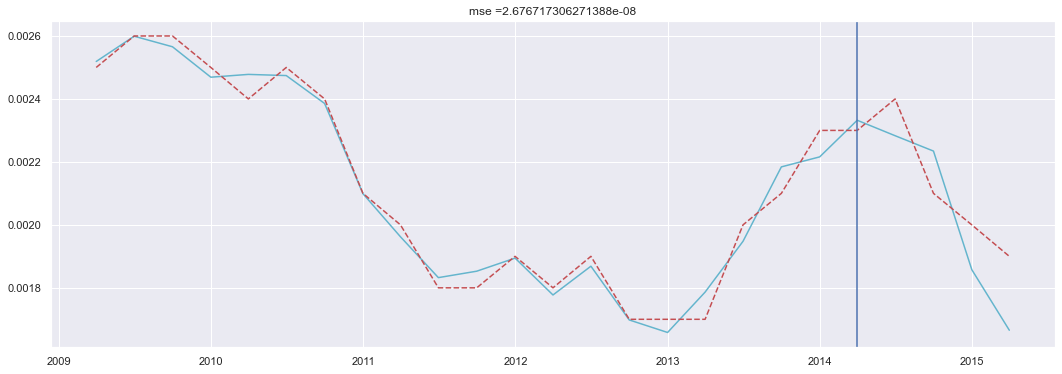

In [59]:
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(n_Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

## Analyse des correlations

### Analyse des variables caractéristiques du portfeuille

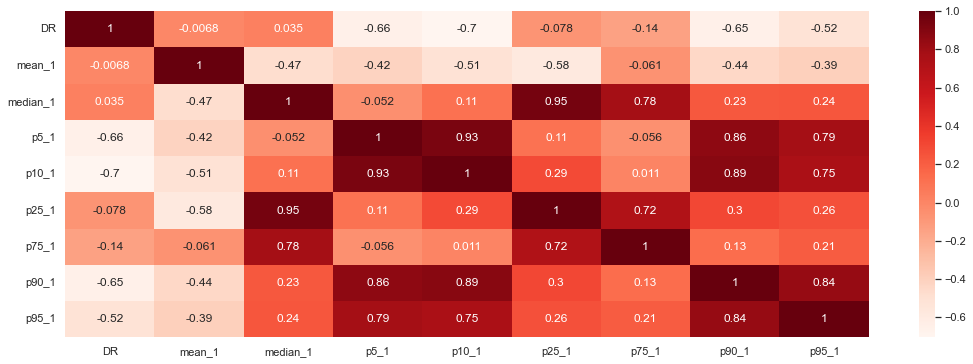

In [145]:
# Note d'octroi recalulée
corre(X2[col_portefeuille[0:8]],Y2)

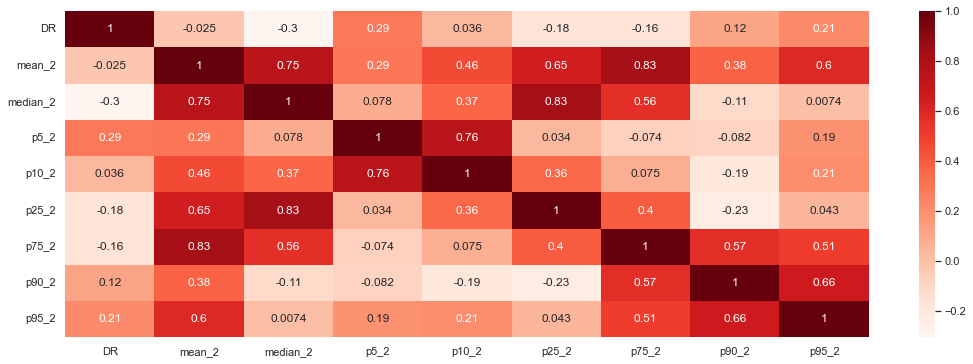

In [146]:
#Durée écoulée depuis le dernier impayé
corre(X2[col_portefeuille[8:16]],Y2)

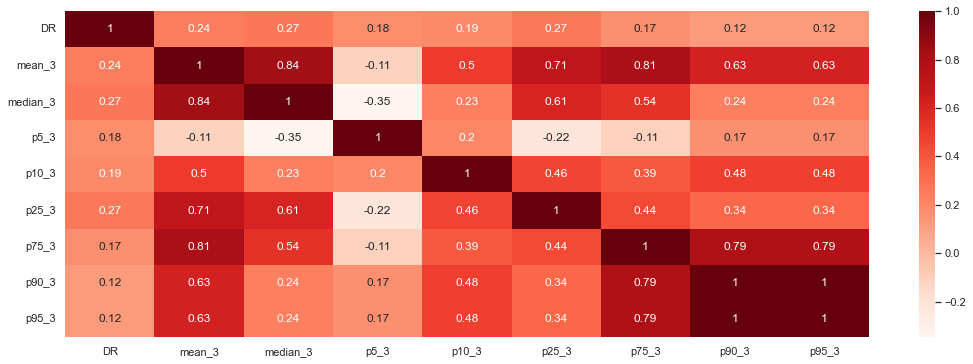

In [147]:
# Durée de l'impayé encours
corre(X2[col_portefeuille[16:24]],Y2)

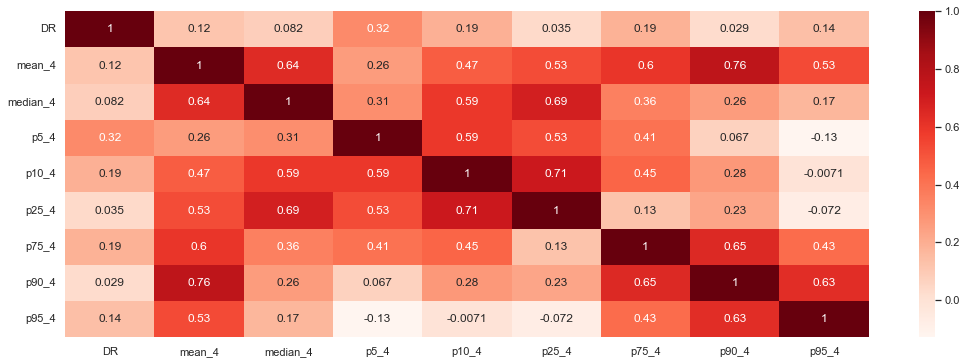

In [148]:
# Durée maximale de l'impayé
corre(X2[col_portefeuille[24:32]],Y2)

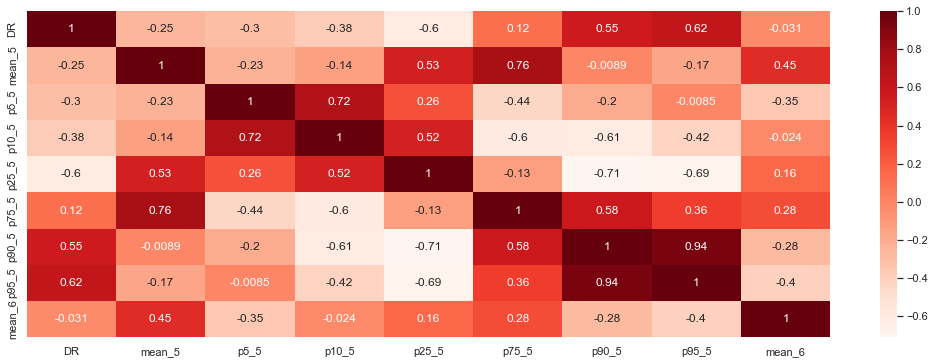

In [149]:
# Créance après répartition solde créditeurs
corre(X2[col_portefeuille[32:40]],Y2)

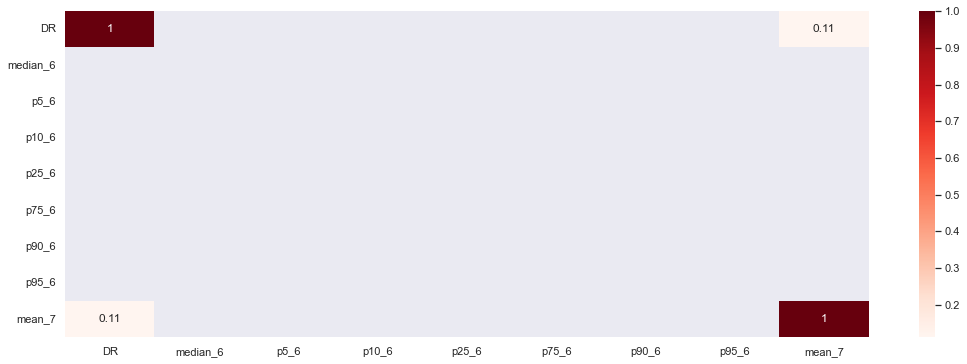

In [150]:
# Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion
corre(X2[col_portefeuille[40:48]],Y2)

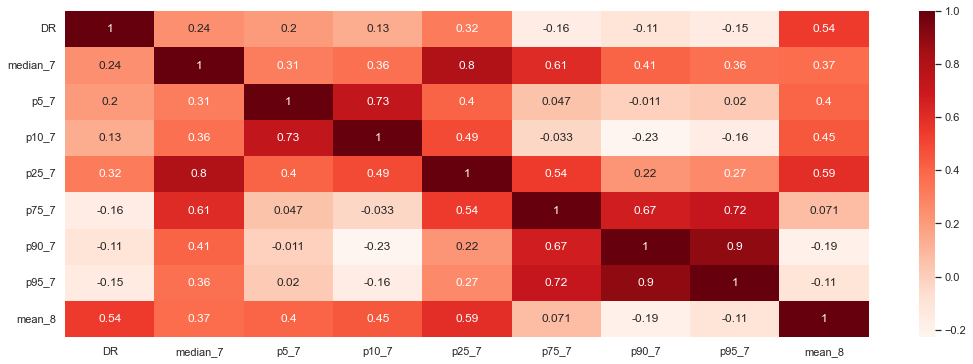

In [151]:
# Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat
corre(X2[col_portefeuille[48:56]],Y2)

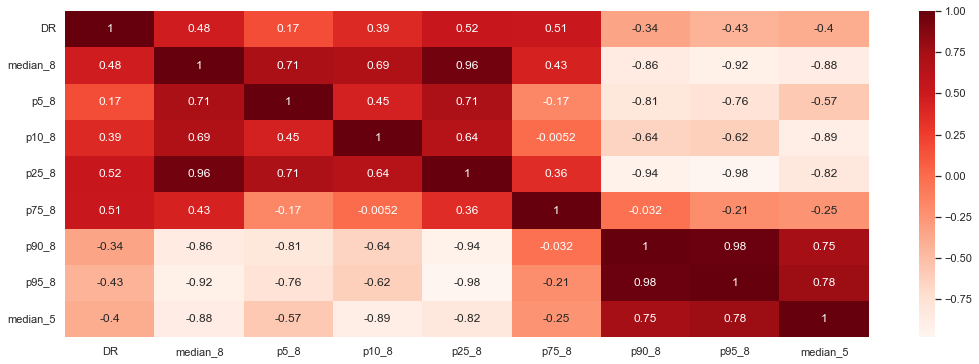

In [152]:
# Pourcentage apport
corre(X2[col_portefeuille[56:64]],Y2)

### Analyse des variables caractéristiques des clients

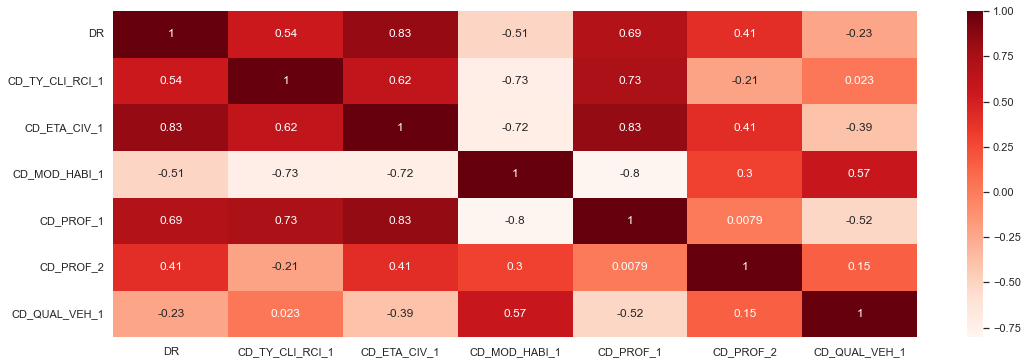

In [153]:
corre(X2[col_clients],Y2)

### Analyse des variables macro

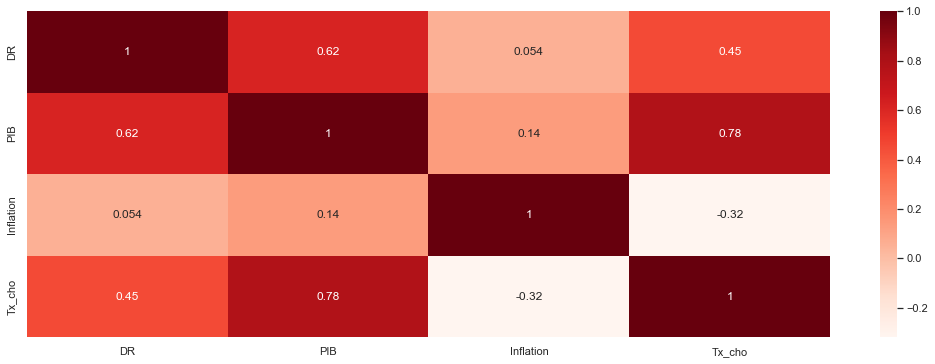

In [154]:
corre(X2[col_macro],Y2)

### Multicollinéarité test
On va analyser les différentes colonnes obtenues et enlever les variables qui sont trop colinéaires entre elles

In [158]:
col_2_corr = keep_col(X2,Y2,0.60,0.90)

Columns with corr with DR >0.6:
['p5_1' 'p10_1' 'p90_1' 'p25_5' 'p95_5' 'CD_ETA_CIV_1' 'CD_PROF_1' 'PIB']
8 variables

 After studying inter correlation
Columns with inter corr<0.9:
{'PIB', 'p5_1', 'CD_PROF_1', 'p95_5'}
4 variables


### Conclusion

In [159]:
col_2_corr = list(set(col_2_corr))
print(f'Il y a {len(col_2_corr)} variables:', col_2_corr,sep='\n')

Il y a 4 variables:
['PIB', 'p5_1', 'CD_PROF_1', 'p95_5']


## Low variance method

In [160]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =0.25).fit(X2)
col_2_vt = X2.loc[:,vt.get_support()].columns
print(f'Il y a {len(col_2_vt)} variables:', col_2_vt,sep='\n')

Il y a 35 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4',
       'p75_4', 'p90_4', 'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5',
       'p90_5', 'p95_5', 'median_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Kbest method

In [161]:
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(f_regression, k=20).fit(X2, Y2)
col_2_kb = X2.loc[:,kb.get_support()].columns
print(f'Il y a {len(col_2_kb)} variables:', col_2_kb,sep='\n')

Il y a 20 variables:
Index(['p5_1', 'p10_1', 'p90_1', 'p95_1', 'p25_5', 'p90_5', 'p95_5', 'mean_8',
       'median_8', 'p25_8', 'p75_8', 'p95_8', 'median_5', 'CD_TY_CLI_RCI_1',
       'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1', 'CD_PROF_2', 'PIB',
       'Tx_cho'],
      dtype='object')


/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


## Recursive feature elimination



In [162]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
rfecv = RFECV(linreg, step=1,min_features_to_select=15, cv=8).fit(X2, Y2)
col_2_rfecv = X2.loc[:,rfecv.get_support()].columns
print(f'Il y a {len(col_2_rfecv)} variables:', col_2_rfecv,sep='\n')


Il y a 44 variables:
Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'p75_2', 'mean_3', 'p10_3', 'p25_3', 'p75_3', 'p95_3',
       'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7',
       'p90_7', 'p95_7', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8',
       'p90_8', 'p95_8', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1',
       'CD_PROF_2', 'CD_QUAL_VEH_1', 'Inflation', 'Tx_cho'],
      dtype='object')


## Feature selection using SelectFromModel

In [171]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
sfm = SelectFromModel(linreg).fit(X2, Y2)
col_2_sfm  = X2.loc[:,sfm .get_support()].columns
print(f'Il y a {len(col_2_sfm )} variables:', col_2_sfm ,sep='\n')


Il y a 18 variables:
Index(['mean_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4',
       'p75_4', 'p90_4', 'p95_4', 'Inflation'],
      dtype='object')


## Tree-based feature selection

In [172]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
etc = ExtraTreesRegressor(n_estimators=50).fit(X2, Y2)
sfm2 = SelectFromModel(etc, prefit=True)
col_2_sfm2  = X2.loc[:,sfm2 .get_support()].columns
print(f'Il y a {len(col_2_sfm2 )} variables:', col_2_sfm2 ,sep='\n')


Il y a 14 variables:
Index(['p5_1', 'p10_1', 'p90_1', 'mean_2', 'median_2', 'p75_2', 'p25_5',
       'mean_8', 'median_8', 'p25_8', 'CD_ETA_CIV_1', 'CD_PROF_1', 'CD_PROF_2',
       'PIB'],
      dtype='object')


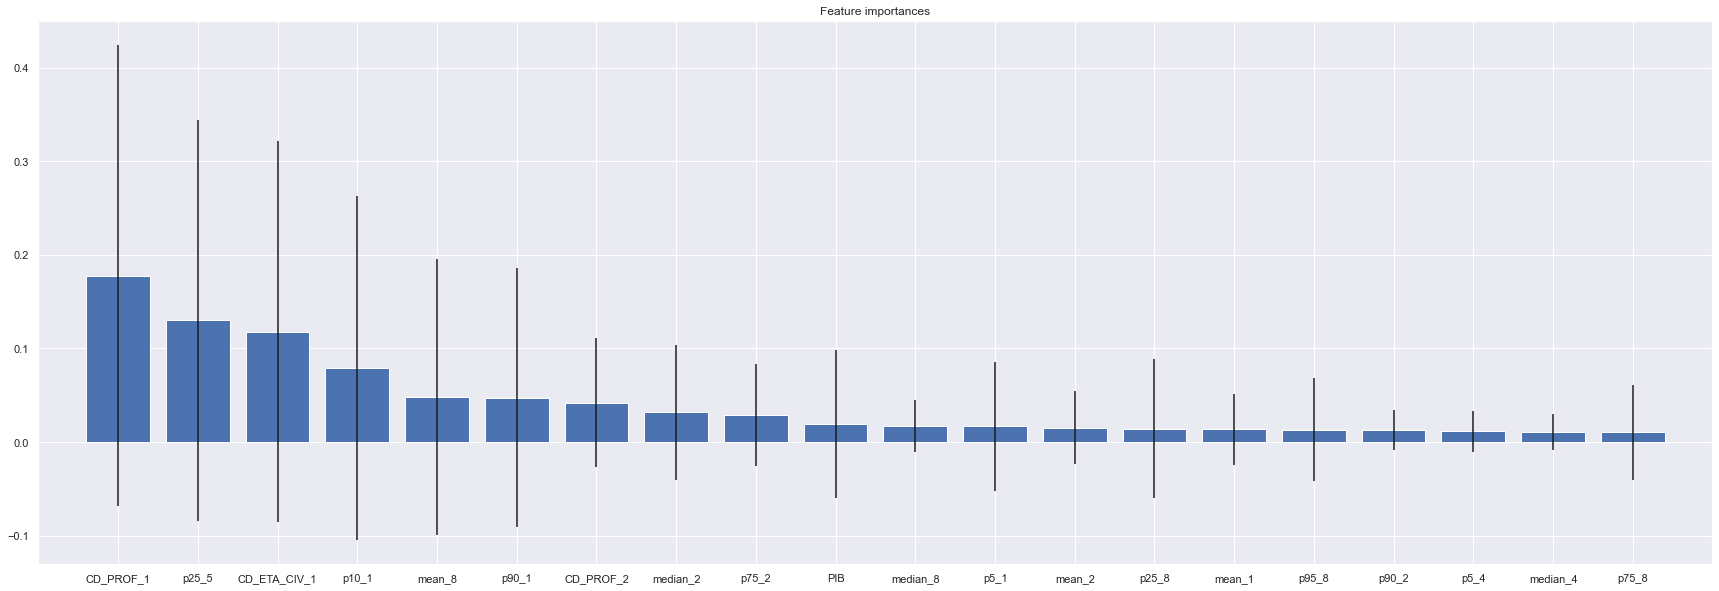

In [173]:
#plot the importances #
importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
indices_names = list(map(lambda x : X2.columns[x],indices))
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices_names)
plt.xlim([-1, len(indices)])
plt.show()

## Sequential Feature Selection 

In [174]:
# forward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_forward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='forward').fit(X2, Y2)
col_2_sfs_forward  = X2.loc[:,sfs_forward .get_support()].columns
print(f'Il y a {len(col_2_sfs_forward )} variables:', col_2_sfs_forward ,sep='\n')

Il y a 20 variables:
Index(['p5_2', 'p10_2', 'p75_2', 'p90_2', 'median_3', 'p25_3', 'median_4',
       'p95_4', 'mean_6', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6',
       'p90_6', 'p95_6', 'mean_7', 'p90_7', 'p5_8', 'CD_PROF_1'],
      dtype='object')


In [175]:
# backward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_backward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='backward').fit(X2, Y2)
col_2_sfs_backward  = X2.loc[:,sfs_backward .get_support()].columns
print(f'Il y a {len(col_2_sfs_backward )} variables:', col_2_sfs_backward ,sep='\n')

Il y a 20 variables:
Index(['mean_2', 'median_2', 'p10_2', 'p75_2', 'p95_2', 'mean_3', 'p5_3',
       'p10_3', 'p75_3', 'p95_3', 'p5_4', 'p10_4', 'p25_4', 'p90_4', 'p95_4',
       'p5_5', 'p25_5', 'p90_5', 'p95_5', 'Inflation'],
      dtype='object')


## Show what feature was selected

In [176]:
cols_feature_selection_2 = [col_2_corr,col_2_vt,col_2_kb,col_2_rfecv,col_2_sfm,col_2_sfm2,col_2_sfs_forward,col_2_sfs_backward]
method = ['Methode correlation','Low variance methode','Methode Kbest','Methode RFECV','Methode SelectFromModel','Method Tree','Methode sequential forward','Methode sequential backward']

In [178]:
for cols, met in zip(cols_feature_selection_2,method):
  print('-'*40)
  print(f'{met}: {len(cols)} variables')
  print(cols)
print('-'*40,end='\n')

----------------------------------------
Methode correlation: 4 variables
['PIB', 'p5_1', 'CD_PROF_1', 'p95_5']
----------------------------------------
Low variance methode: 35 variables
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4',
       'p75_4', 'p90_4', 'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5',
       'p90_5', 'p95_5', 'median_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')
----------------------------------------
Methode Kbest: 20 variables
Index(['p5_1', 'p10_1', 'p90_1', 'p95_1', 'p25_5', 'p90_5', 'p95_5', 'mean_8',
       'median_8', 'p25_8', 'p75_8', 'p95_8', 'median_5', 'CD_TY_CLI_RCI_1',
       'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1', 'CD_PROF_2', 'PIB',
       'Tx_cho'],
      dtype='object')
----------------------------------------
Methode RFECV: 44 variables
Index(['mean_1', 

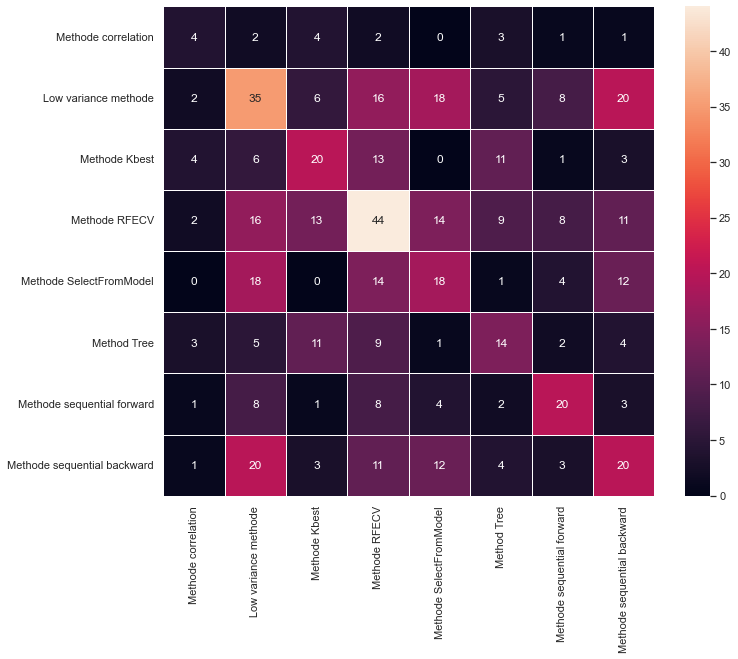

In [179]:
import itertools
df_common = pd.DataFrame(columns=method, index=method)
for i, j in itertools.product(range(len(method)),range(len(method))):
  col1, col2 = cols_feature_selection_2[i], cols_feature_selection_2[j]
  method1, method2 = method[i], method[j]
  n_common = len(set(col1).intersection(col2))
  df_common.loc[method1,method2] = n_common

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_common.astype('float64'), annot=True,linewidth=.5,ax=ax)
plt.show()

# Feature selection de chronique 8

## Approche naive par analyse des graphiques 

In [96]:
X8.columns

Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1',
       'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 'Inflation',
       'Tx_cho'],
      dtype='object')

In [97]:
col_8_naive = ['mean_1','p5_1', 'p25_1',
               'p5_2', 'p10_2', 
       'mean_3', 
       'mean_4',
       'p10_5', 'p25_5', 
        'median_6',
      'p25_6', 'p90_6', 'p95_6', 
       'median_8', 'p90_8',
       'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1',
       'PIB', 'Inflation']
new_col_8_naive = col_8_naive

On supprime la première ligne car elle peut biaiser le modèle, valeur de DR=0.024

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              4038.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                    3.42e-09
Time:                        23:27:21   Log-Likelihood:                          133.67
No. Observations:                  25   AIC:                                     -227.3
Df Residuals:                       5   BIC:                                     -203.0
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Text(0.5, 1.0, 'mse =1.3287910222327263e-06')

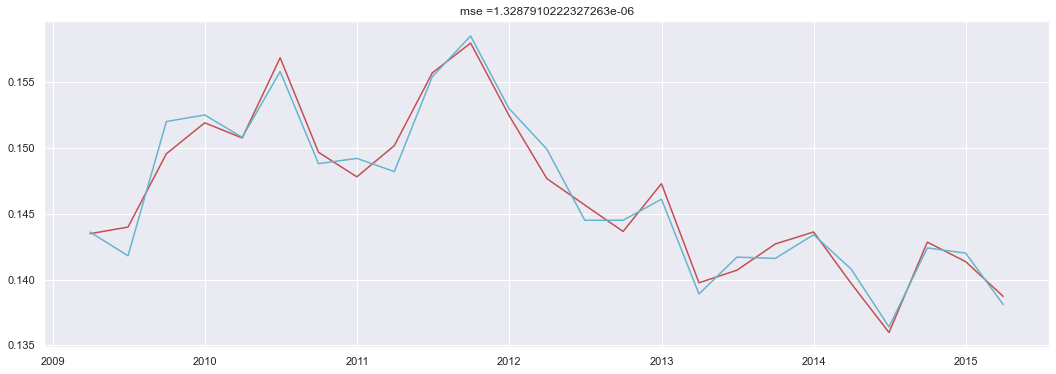

In [98]:
Xnaif = df8[col_8_naive].iloc[1:,]
Ynaif = Y8[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

## Analyse des correlations

### Analyse des variables caractéristiques du portfeuille

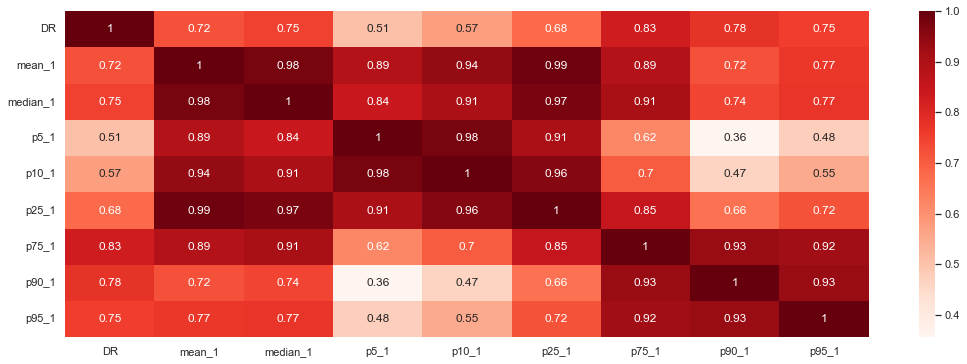

In [181]:
# Note d'octroi recalulée
corre(X8[col_portefeuille[0:8]],Y8)

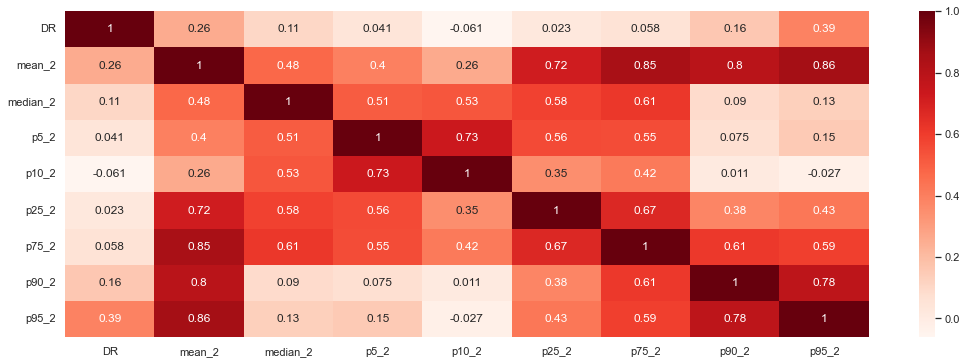

In [182]:
#Durée écoulée depuis le dernier impayé
corre(X8[col_portefeuille[8:16]],Y8)

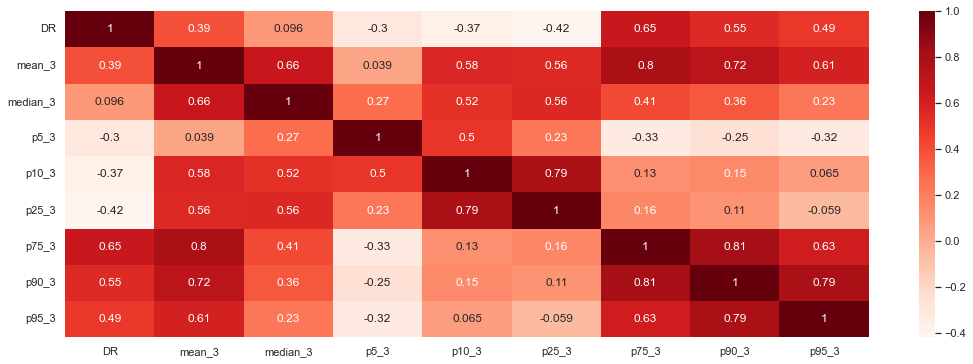

In [183]:
# Durée de l'impayé encours
corre(X8[col_portefeuille[16:24]],Y8)

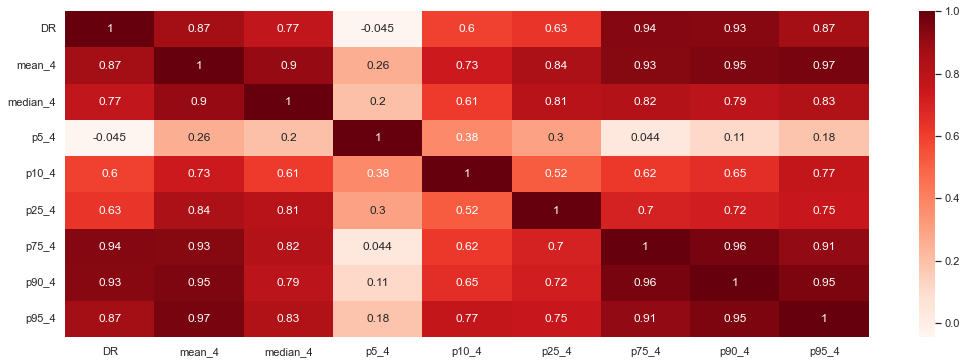

In [184]:
# Durée maximale de l'impayé
corre(X8[col_portefeuille[24:32]],Y8)

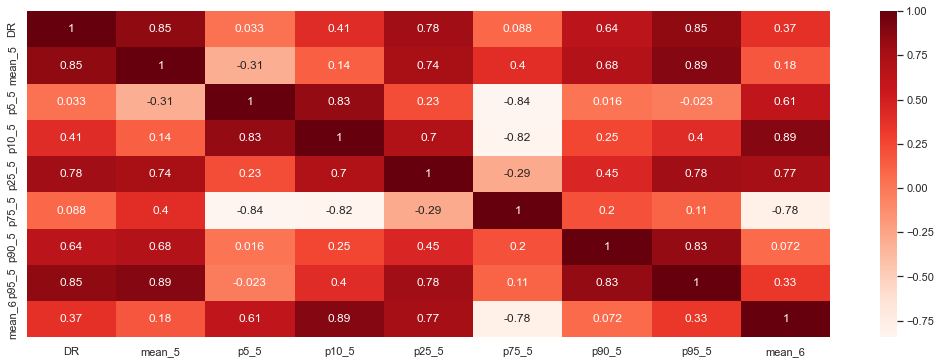

In [185]:
# Créance après répartition solde créditeurs
corre(X8[col_portefeuille[32:40]],Y8)

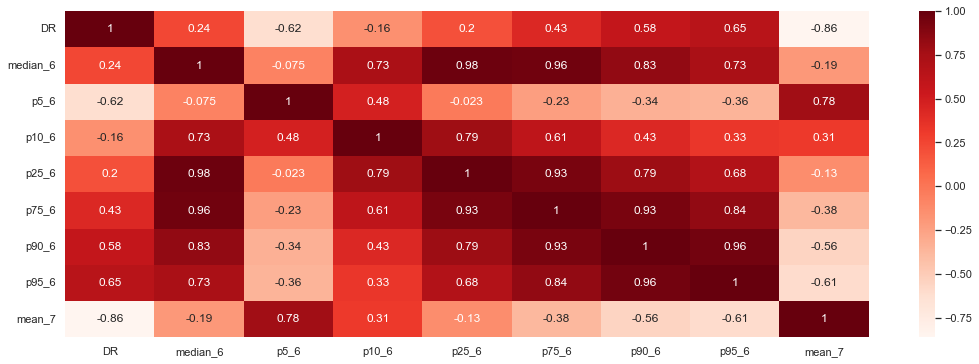

In [186]:
# Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion
corre(X8[col_portefeuille[40:48]],Y8)

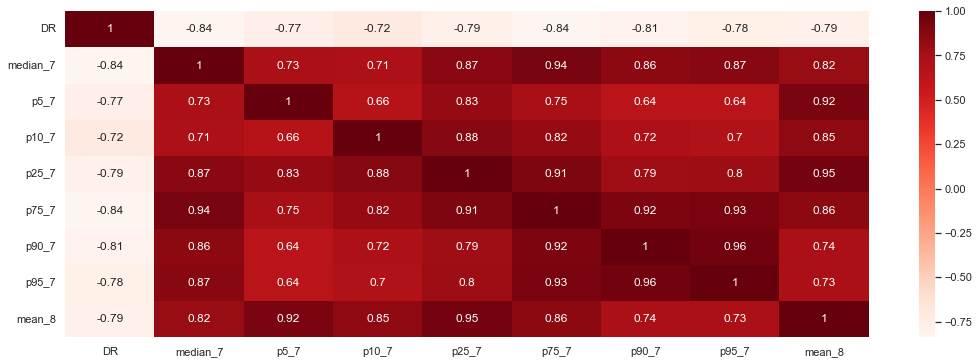

In [187]:
# Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat
corre(X8[col_portefeuille[48:56]],Y8)

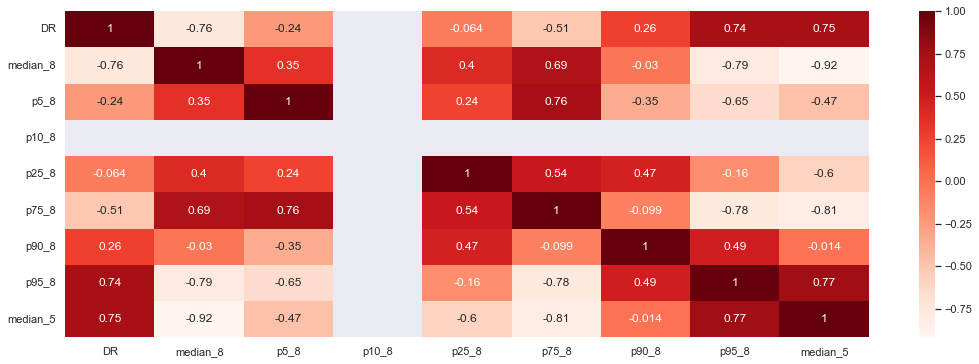

In [188]:
# Pourcentage apport
corre(X8[col_portefeuille[56:64]],Y8)

### Analyse des variables caractéristiques des clients

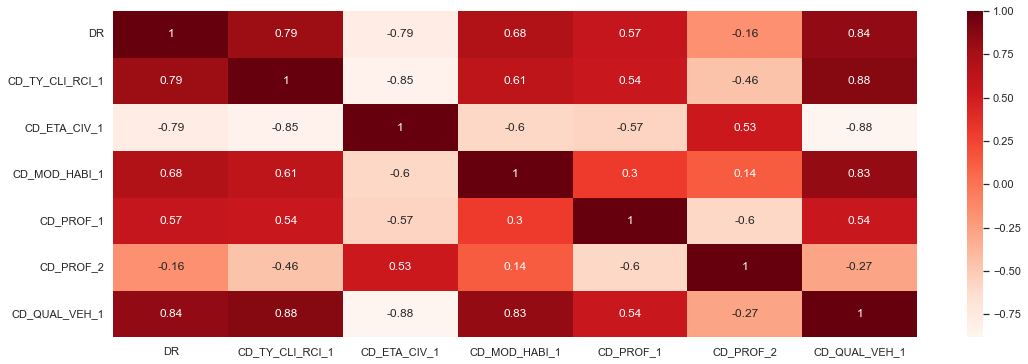

In [189]:
corre(X8[col_clients],Y8)

### Analyse des variables macro

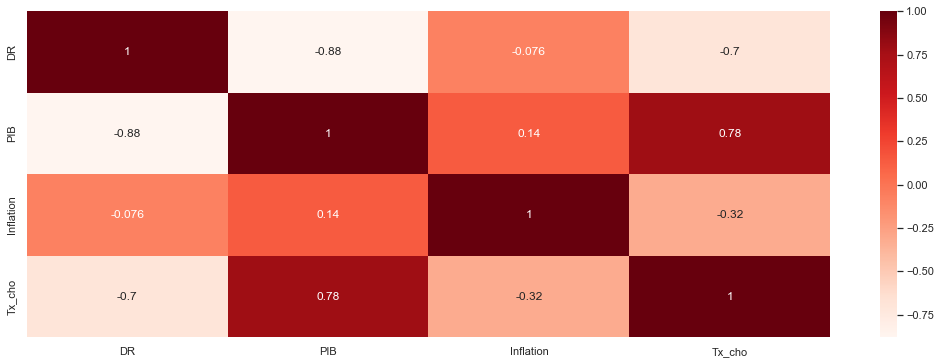

In [190]:
corre(X8[col_macro],Y8)

### Multicollinéarité test
On va analyser les différentes colonnes obtenues et enlever les variables qui sont trop colinéaires entre elles

In [191]:
col_8_corr = keep_col(X8,Y8,0.60,0.90)

Columns with corr with DR >0.6:
['mean_1' 'median_1' 'p25_1' 'p75_1' 'p90_1' 'p95_1' 'p75_3' 'mean_4'
 'median_4' 'p25_4' 'p75_4' 'p90_4' 'p95_4' 'mean_5' 'p25_5' 'p90_5'
 'p95_5' 'p5_6' 'p95_6' 'mean_7' 'median_7' 'p5_7' 'p10_7' 'p25_7' 'p75_7'
 'p90_7' 'p95_7' 'mean_8' 'median_8' 'p95_8' 'median_5' 'CD_TY_CLI_RCI_1'
 'CD_ETA_CIV_1' 'CD_MOD_HABI_1' 'CD_QUAL_VEH_1' 'PIB' 'Tx_cho']
37 variables

 After studying inter correlation
Columns with inter corr<0.9:
{'p90_1', 'median_5', 'median_8', 'p95_4', 'mean_5', 'p95_7', 'mean_7', 'mean_4', 'p90_4', 'p75_1', 'p25_7', 'mean_8', 'Tx_cho', 'mean_1', 'p75_4', 'p95_8', 'p90_7', 'p5_7', 'p95_5', 'median_7', 'p25_5', 'CD_QUAL_VEH_1', 'median_1', 'p75_7'}
24 variables


### Conclusion

In [192]:
col_8_corr = list(set(col_8_corr))
print(f'Il y a {len(col_8_corr)} variables:', col_8_corr,sep='\n')

Il y a 24 variables:
['p90_1', 'median_5', 'median_8', 'p95_4', 'mean_5', 'p95_7', 'mean_7', 'mean_4', 'p90_4', 'p75_1', 'p25_7', 'mean_8', 'Tx_cho', 'mean_1', 'p75_4', 'p95_8', 'p90_7', 'p5_7', 'p95_5', 'median_7', 'p25_5', 'CD_QUAL_VEH_1', 'median_1', 'p75_7']


## Low variance method

In [193]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =0.25).fit(X8)
col_8_vt = X8.loc[:,vt.get_support()].columns
print(f'Il y a {len(col_8_vt)} variables:', col_8_vt,sep='\n')

Il y a 33 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5',
       'median_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Kbest method

In [194]:
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(f_regression, k=20).fit(X8, Y8)
col_8_kb = X8.loc[:,kb.get_support()].columns
print(f'Il y a {len(col_8_kb)} variables:', col_8_kb,sep='\n')

Il y a 20 variables:
Index(['p75_1', 'p90_1', 'mean_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5',
       'p25_5', 'p95_5', 'mean_7', 'median_7', 'p25_7', 'p75_7', 'p90_7',
       'p95_7', 'mean_8', 'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_QUAL_VEH_1',
       'PIB'],
      dtype='object')


/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms


## Recursive feature elimination with cross-validation to select features.



In [195]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
rfecv = RFECV(linreg, step=1, min_features_to_select=15, cv=8).fit(X8, Y8)
col_8_rfecv = X8.loc[:,rfecv.get_support()].columns
print(f'Il y a {len(col_8_rfecv)} variables:', col_8_rfecv,sep='\n')


Il y a 49 variables:
Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p75_1', 'p90_1', 'p95_1',
       'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4',
       'p75_4', 'p90_4', 'p95_4', 'median_7', 'p5_7', 'p10_7', 'p25_7',
       'p90_7', 'p95_7', 'p5_8', 'p75_8', 'p90_8', 'p95_8', 'CD_TY_CLI_RCI_1',
       'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1', 'CD_PROF_2',
       'CD_QUAL_VEH_1', 'Inflation', 'Tx_cho'],
      dtype='object')


## Feature selection using SelectFromModel

In [196]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
sfm = SelectFromModel(linreg).fit(X8, Y8)
col_8_sfm  = X8.loc[:,sfm .get_support()].columns
print(f'Il y a {len(col_8_sfm )} variables:', col_8_sfm ,sep='\n')


Il y a 20 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'mean_3',
       'median_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'median_4',
       'p5_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4', 'Inflation'],
      dtype='object')


## Tree-based feature selection

In [197]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
etc = ExtraTreesRegressor(n_estimators=50).fit(X8, Y8)
sfm2 = SelectFromModel(etc, prefit=True)
col_8_sfm2  = X8.loc[:,sfm2 .get_support()].columns
print(f'Il y a {len(col_8_sfm2 )} variables:', col_8_sfm2 ,sep='\n')


Il y a 14 variables:
Index(['p90_1', 'p95_3', 'mean_4', 'p75_4', 'p90_4', 'p95_4', 'p95_5', 'p5_7',
       'p25_7', 'p75_7', 'mean_8', 'median_8', 'PIB', 'Inflation'],
      dtype='object')


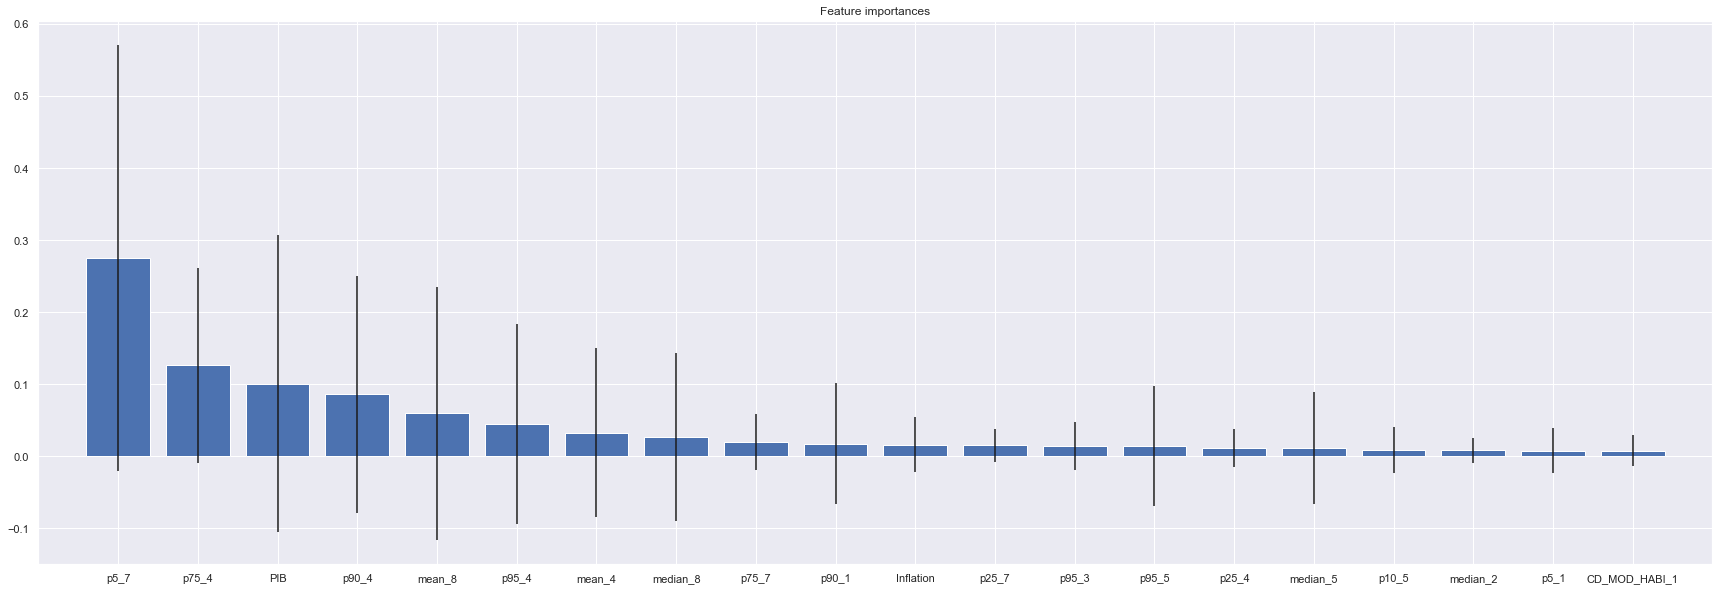

In [198]:
#plot the importances #
importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
indices_names = list(map(lambda x : X8.columns[x],indices))
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices_names)
plt.xlim([-1, len(indices)])
plt.show()

## Sequential Feature Selection 

In [199]:
# forward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_forward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='forward').fit(X8, Y8)
col_8_sfs_forward  = X8.loc[:,sfs_forward .get_support()].columns
print(f'Il y a {len(col_8_sfs_forward )} variables:', col_8_sfs_forward ,sep='\n')

Il y a 20 variables:
Index(['p10_1', 'mean_2', 'p10_2', 'p95_2', 'median_3', 'p25_3', 'p75_3',
       'p10_4', 'p90_4', 'p90_5', 'p5_6', 'p10_6', 'mean_7', 'median_7',
       'p75_7', 'mean_8', 'p10_8', 'p95_8', 'CD_MOD_HABI_1', 'CD_PROF_2'],
      dtype='object')


In [200]:
# backward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_backward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='backward').fit(X8, Y8)
col_8_sfs_backward  = X8.loc[:,sfs_backward .get_support()].columns
print(f'Il y a {len(col_8_sfs_backward )} variables:', col_8_sfs_backward ,sep='\n')

Il y a 20 variables:
Index(['median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2', 'mean_3',
       'median_3', 'p5_3', 'p75_3', 'p95_3', 'p75_4', 'p90_4', 'p95_4',
       'mean_5', 'p5_5', 'p90_5', 'p95_5', 'median_5', 'PIB'],
      dtype='object')


## Show what feature was selected

In [202]:
cols_feature_selection_8 = [col_8_corr,col_8_vt,col_8_kb,col_8_rfecv,col_8_sfm,col_8_sfm2,col_8_sfs_forward,col_8_sfs_backward]
method = ['Methode correlation','Low variance methode','Methode Kbest','Methode RFECV','Methode SelectFromModel','Method Tree','Methode sequential forward','Methode sequential backward']

In [203]:
for cols, met in zip(cols_feature_selection_8,method):
  print('-'*40)
  print(f'{met}: {len(cols)} variables')
  print(cols)
print('-'*40,end='\n')

----------------------------------------
Methode correlation: 24 variables
['p90_1', 'median_5', 'median_8', 'p95_4', 'mean_5', 'p95_7', 'mean_7', 'mean_4', 'p90_4', 'p75_1', 'p25_7', 'mean_8', 'Tx_cho', 'mean_1', 'p75_4', 'p95_8', 'p90_7', 'p5_7', 'p95_5', 'median_7', 'p25_5', 'CD_QUAL_VEH_1', 'median_1', 'p75_7']
----------------------------------------
Low variance methode: 33 variables
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5',
       'median_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')
----------------------------------------
Methode Kbest: 20 variables
Index(['p75_1', 'p90_1', 'mean_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5',
       'p25_5', 'p95_5', 'mean_7', 'median_7', 'p25_7', 'p75_7', 'p90_7',
       'p95_7', 'mean

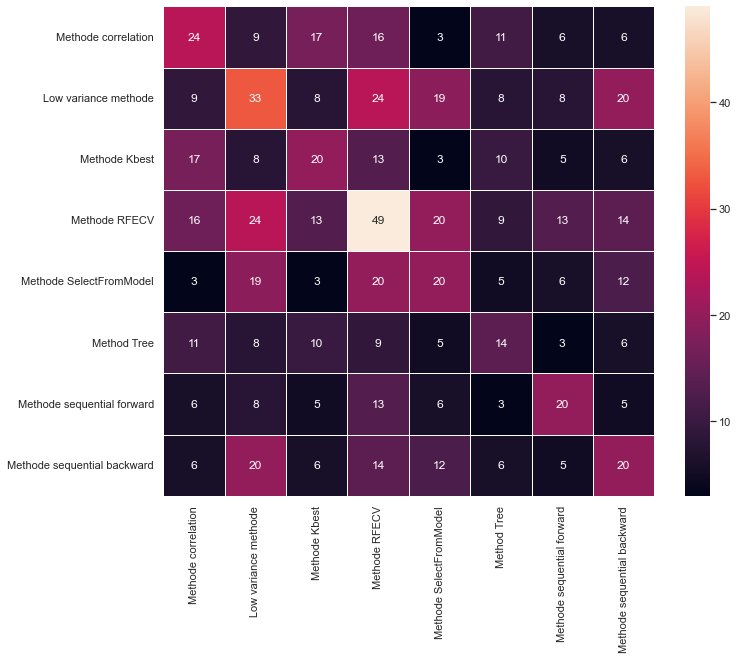

In [204]:
import itertools
df_common = pd.DataFrame(columns=method, index=method)
for i, j in itertools.product(range(len(method)),range(len(method))):
  col1, col2 = cols_feature_selection_8[i], cols_feature_selection_8[j]
  method1, method2 = method[i], method[j]
  n_common = len(set(col1).intersection(col2))
  df_common.loc[method1,method2] = n_common

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_common.astype('float64'), annot=True,linewidth=.5,ax=ax)
plt.show()